### Import Required library

In [1]:
import pandas as pd 
import missingno as msno
import math
import numpy as np
import seaborn as sns

In [2]:
#CO2 emission data 
data = pd.read_excel('export_20190917_1439.xlsx',index_col=0)
data.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,0.41388,2.0225,6.1512,NaN,0.54895,NaN,0.036640,48.7645,2.4936,0.61856,...,4.3145,47.8515,NaN,57.0168,7.4839,NaN,NaN,3.6310,4.3552,5.9432
1961,0.49080,2.2790,6.0559,NaN,0.45371,NaN,0.047632,51.1267,2.5714,0.64555,...,4.1168,49.3462,NaN,51.8798,7.9783,NaN,NaN,2.6637,3.7090,5.0613
1962,0.68859,2.4622,5.6610,NaN,1.17910,NaN,0.102590,53.6401,2.6987,0.70894,...,4.0069,51.7895,0.040304,54.0561,9.3377,NaN,NaN,3.8838,3.5827,4.8890
1963,0.70674,2.0812,5.4192,NaN,1.14970,NaN,0.084272,50.0327,2.8942,0.67909,...,4.3148,55.5408,0.032976,56.1517,9.1104,NaN,NaN,2.9165,3.4445,4.7004
1964,0.83855,2.0152,5.6430,NaN,1.22290,NaN,0.091600,55.6700,3.0780,0.66028,...,4.5527,59.0674,0.062288,56.5500,11.7878,NaN,NaN,3.6310,3.2750,4.4691


In [3]:
#GDP per capita data
gdp = pd.read_excel("GDP per capita.xls")
gdp.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,24101.109429,25870.755945,26533.343900,27430.752401,28656.520214,28648.990021,28499.089435,30215.949227,...,34693.086745,33732.847450,35492.618487,35498.982089,37419.892817,38223.372261,38249.054869,38390.271649,39454.629831,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1454.663015,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1951.558504
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,6092.783245,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6440.976270
3,Albania,ALB,2549.464533,1909.107682,1823.301602,2057.442806,2289.865511,2665.756031,2980.056366,2717.353077,...,8814.834988,9628.003545,10207.753519,10526.255328,10571.007488,11259.289824,11662.044933,11868.211515,12930.067676,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we see that country name in gdp data as index while in the emission it is feature column. So we need to represent country name of the emission data as one column to do that wee use transpose it.

In [4]:
emission = data.transpose()
emission.drop(emission.iloc[:,0:30], axis=1,inplace=True)
emission.index.names=['country_name']

In [5]:
print(emission.shape)
print(gdp.shape)

(220, 28)
(264, 31)


In [6]:
GDP = gdp.drop(labels=['Country Code', '2018'], axis=1)
GDP.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,24101.109429,25870.755945,26533.343900,27430.752401,28656.520214,28648.990021,28499.089435,30215.949227,30512.683909,...,38515.263797,34693.086745,33732.847450,35492.618487,35498.982089,37419.892817,38223.372261,38249.054869,38390.271649,39454.629831
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1218.118215,1454.663015,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754
2,Angola,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,3027.341795,...,6221.423373,6092.783245,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940
3,Albania,2549.464533,1909.107682,1823.301602,2057.442806,2289.865511,2665.756031,2980.056366,2717.353077,3021.015350,...,8228.364871,8814.834988,9628.003545,10207.753519,10526.255328,10571.007488,11259.289824,11662.044933,11868.211515,12930.067676
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
GDP.rename(columns={'Country Name':'country_name'},  inplace=True)

In [8]:
emission.reset_index(level=0,inplace=True)

### Missing value analysis

We are droping the row if there is any missing value as NaN contain

In [9]:
GDP.dropna(axis=0,how='any', inplace=True)
emission.dropna(axis=0, how='any', inplace=True)

In [10]:
# check how many common countrpresent in these datasets
emission['country_name'].isin(GDP['country_name']).value_counts()

True     157
False     48
Name: country_name, dtype: int64

### Merging of the dataframe 

Using the country name common in both dataframe so we use inner joinmethod to merge two dataframe.

In [11]:
df_inner = pd.merge(emission, GDP, on='country_name', how='inner')  

Further we merge another dataframe as power_cosumption per capita of each country

In [12]:
power_consumption = pd.read_excel('electric_power_consumption_per_capita.xls', index_col=0)
power_consumption.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,189.257654,206.454411,207.013343,219.253430,280.214547,312.228825,NaN,NaN,NaN,NaN
Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1835.684072,1943.343354,2205.703920,2118.327776,2533.252829,2309.366503,NaN,NaN,NaN,NaN
Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
power_consumption.drop(labels='Country Code', axis=1, inplace=True)

In [14]:
power_consumption.dropna(axis=0, how='all', inplace=True)

To fill missing value of this dataframe we use imputer function with median of the respective observation.

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
consumption = pd.DataFrame(imp.fit_transform(power_consumption.T))
consumption.columns = power_consumption.T.columns
consumption.index = power_consumption.T.index

In [17]:
consumption = consumption.T

In [18]:
consumption.reset_index(level=0,inplace=True)
consumption.rename(columns={'Country Name':'country_name'},  inplace=True)

Since there is most recent year common in this dataframe is 2014 son we are doing analysis using those recent year data. 

In [19]:
df1= df_inner[['country_name',2014,'2014']]
consumption1 = consumption[['country_name', '2014']]
df_2 = pd.merge(df1, consumption1, on='country_name', how='inner')  

In [20]:
df_2.head()

,country_name,2014,2014_x,2014_y
0,Albania,5.7122,11259.289824,2309.366503
1,Algeria,143.1771,14317.042718,1362.871919
2,Angola,34.4576,7199.245478,312.228825
3,Argentina,202.6715,20008.320644,3074.702071
4,Armenia,5.5814,8405.073655,1961.610395


In [21]:
df_2.rename(columns={2014:'CO2_emission', '2014_x':'gdp_per_capita', '2014_y':'power_consumption'},  inplace=True)
df_2.head()

,country_name,CO2_emission,gdp_per_capita,power_consumption
0,Albania,5.7122,11259.289824,2309.366503
1,Algeria,143.1771,14317.042718,1362.871919
2,Angola,34.4576,7199.245478,312.228825
3,Argentina,202.6715,20008.320644,3074.702071
4,Armenia,5.5814,8405.073655,1961.610395


In [22]:
df_2.describe() # using describe function we can check some statical feature of these dataframe 

,CO2_emission,gdp_per_capita,power_consumption
count,117.00000,117.000000,117.000000
mean,277.93276,21922.723721,4254.932856
std,1066.31233,20179.338844,6270.547907
min,1.97580,829.362646,39.055805
25%,8.79080,6017.671947,742.538400
50%,39.23780,15144.545446,2309.366503
75%,159.71240,33370.475164,5672.064134
max,9820.36050,101297.575745,53832.479092


### Exploratory Data Analysis (EDA)

Text(0.5, 0.98, 'Pairplot Before transformation')

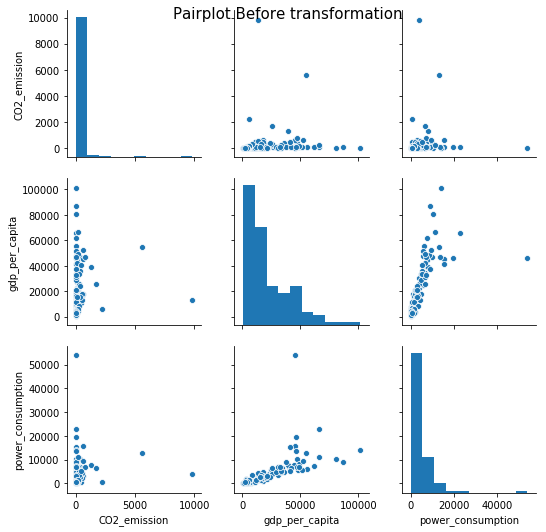

In [23]:
plot = sns.pairplot(df_2[['CO2_emission', 'gdp_per_capita', 'power_consumption']])
plot.fig.suptitle("Pairplot Before transformation",fontsize=15)

In [24]:
df_2.skew() #  skewness of each features

CO2_emission         7.427636
gdp_per_capita       1.396153
power_consumption    4.842872
dtype: float64

In [25]:
df_2['log_gdp'] = np.log10(df_2['gdp_per_capita'])
df_2['log_power_consumption'] = np.log10(df_2['power_consumption'])
df_2['log_emission']= np.log10(df_2['CO2_emission'])

In [26]:
df_2.head()

,country_name,CO2_emission,gdp_per_capita,power_consumption,log_gdp,log_power_consumption,log_emission
0,Albania,5.7122,11259.289824,2309.366503,4.051511,3.363493,0.756803
1,Algeria,143.1771,14317.042718,1362.871919,4.155853,3.134455,2.155874
2,Angola,34.4576,7199.245478,312.228825,3.857287,2.494473,1.537285
3,Argentina,202.6715,20008.320644,3074.702071,4.301211,3.487803,2.306793
4,Armenia,5.5814,8405.073655,1961.610395,3.924542,3.292613,0.746743


Text(0.5, 0.98, 'Pairplot After transformation')

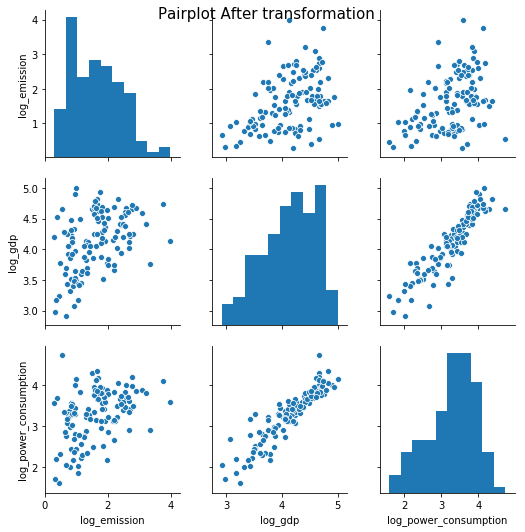

In [27]:
plot = sns.pairplot(df_2[['log_emission', 'log_gdp', 'log_power_consumption']])
plot.fig.suptitle("Pairplot After transformation",fontsize=15)

In [28]:
df_2.skew()

CO2_emission             7.427636
gdp_per_capita           1.396153
power_consumption        4.842872
log_gdp                 -0.438877
log_power_consumption   -0.555632
log_emission             0.499413
dtype: float64

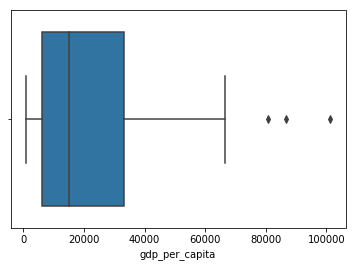

In [29]:
sns.boxplot(x=df_2['gdp_per_capita'])

As we noticed that there is positively skewed data and also there is some outliers so minimise the effect of the ouliers we take do log transformation method on each numeric feature.  

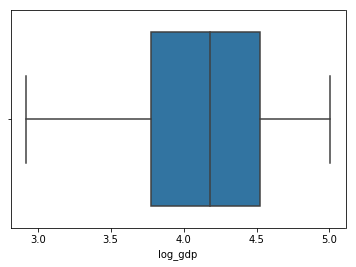

In [30]:
sns.boxplot(x=df_2['log_gdp']) # after transforming the data using log with base 10

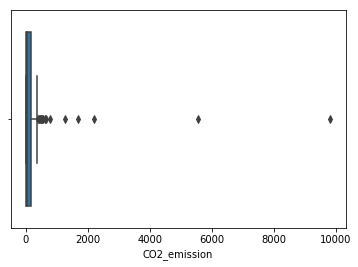

In [31]:
sns.boxplot(x=df_2['CO2_emission'])

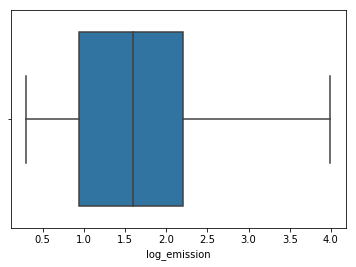

In [32]:
sns.boxplot(x=df_2['log_emission'])

### Inferential Statistical  Testing 

In [33]:
from scipy.stats.stats import pearsonr
emission = df_2['CO2_emission']
gdp = df_2['gdp_per_capita']


pearsonr_coefficient, p_value = pearsonr(gdp, emission)
print("Pearson Correlatin Coefficient %.3f" %pearsonr_coefficient)

Pearson Correlatin Coefficient 0.068


In [34]:
emission = df_2['log_emission']
gdp = df_2['log_gdp']


pearsonr_coefficient, p_value = pearsonr(emission, gdp)
print("Pearson Correlatin Coefficient %.3f" %pearsonr_coefficient)

Pearson Correlatin Coefficient 0.432


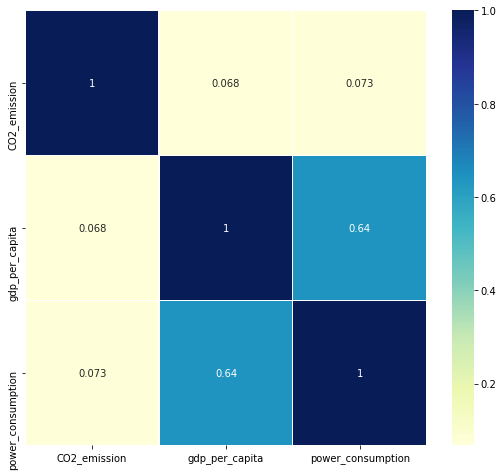

In [36]:
import matplotlib.pyplot as plt 
%matplotlib inline
corr_matrix = df_2.iloc[:, 1:4].corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1,annot=True) 

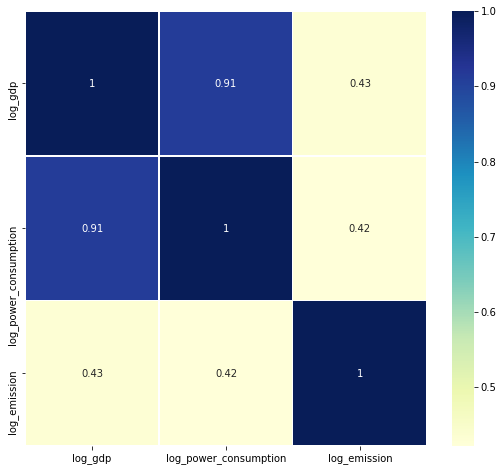

In [37]:
corr_matrix =  df_2.iloc[:, 4:].corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True) 

### Scale the dataframe

In [38]:
from sklearn.preprocessing import StandardScaler , Normalizer,RobustScaler, MinMaxScaler
# Initialise the Scaler 
scaler = StandardScaler() 
normalizer = Normalizer()
robust_scaled = RobustScaler()
min_max_scaled = MinMaxScaler()

In [39]:
scaled_df = scaler.fit_transform(df_2.iloc[:, 4:7])
scaled_df = pd.DataFrame(scaled_df,columns=["log_gdp","log_power_consumption","log_emission"])

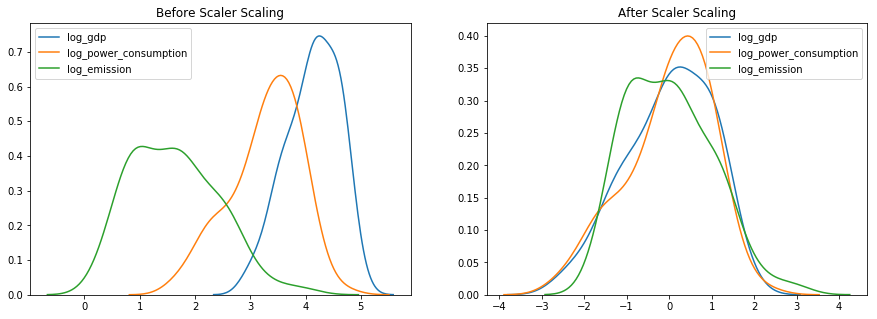

In [40]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.set_title('Before Scaler Scaling')
sns.kdeplot(df_2['log_gdp'], ax=ax1)
sns.kdeplot(df_2['log_power_consumption'], ax=ax1)
sns.kdeplot(df_2['log_emission'], ax=ax1)
ax2.set_title('After Scaler Scaling')
sns.kdeplot(scaled_df['log_gdp'], ax=ax2)
sns.kdeplot(scaled_df['log_power_consumption'], ax=ax2)
sns.kdeplot(scaled_df['log_emission'], ax=ax2)
plt.show()

### Modelling 

#### Linear Regrssion Model  

In [41]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [42]:
X = df_2[['log_gdp']]
y = df_2[['log_emission']]

In [43]:
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=20)

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(93, 1)
(93, 1)
(24, 1)
(24, 1)


In [45]:
regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [46]:
print(regressor.coef_)
print(regressor.intercept_)

[[0.41632946]]
[-0.11648377]


In [47]:
y_pred = regressor.predict(X_test)

In [48]:
metrics.r2_score(y_test, y_pred)

-0.19273339224856167

### Analysis using Ordinary Least Square Method 

In [49]:
import statsmodels.api as sm

In [50]:
df_2['const'] = 1
reg = sm.OLS(endog= df_2['log_emission'], exog = df_2[['log_gdp']])
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           log_emission   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     604.8
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           7.81e-48
Time:                        21:46:32   Log-Likelihood:                -128.11
No. Observations:                 117   AIC:                             258.2
Df Residuals:                     116   BIC:                             261.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
log_gdp        0.3973      0.016     24.592      0.0

In [51]:
df_2.head()

,country_name,CO2_emission,gdp_per_capita,power_consumption,log_gdp,log_power_consumption,log_emission,const
0,Albania,5.7122,11259.289824,2309.366503,4.051511,3.363493,0.756803,1
1,Algeria,143.1771,14317.042718,1362.871919,4.155853,3.134455,2.155874,1
2,Angola,34.4576,7199.245478,312.228825,3.857287,2.494473,1.537285,1
3,Argentina,202.6715,20008.320644,3074.702071,4.301211,3.487803,2.306793,1
4,Armenia,5.5814,8405.073655,1961.610395,3.924542,3.292613,0.746743,1


In [52]:
reg = sm.OLS(endog= df_2['log_emission'], exog = df_2[['log_gdp', 'log_power_consumption']])
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           log_emission   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     312.8
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           3.10e-47
Time:                        21:49:49   Log-Likelihood:                -126.03
No. Observations:                 117   AIC:                             256.1
Df Residuals:                     115   BIC:                             261.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
log_gdp                   0.06

In [53]:
df_2.drop('const', axis=1,inplace=True)

In [54]:
df = df_2.iloc[:, 0:4]

In [55]:
df.head()

,country_name,CO2_emission,gdp_per_capita,power_consumption
0,Albania,5.7122,11259.289824,2309.366503
1,Algeria,143.1771,14317.042718,1362.871919
2,Angola,34.4576,7199.245478,312.228825
3,Argentina,202.6715,20008.320644,3074.702071
4,Armenia,5.5814,8405.073655,1961.610395


In [56]:
#from sklearn.preprocessing import StandardScaler , Normalizer,RobustScaler, MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.utils import shuffle

In [57]:
X = np.array(df['gdp_per_capita']).reshape(-1,1)
y = np.array(df['CO2_emission']).reshape(-1, 1)

In [58]:
X = min_max_scaled.fit_transform(X)
y = min_max_scaled.fit_transform(y)
y = y.ravel()

In [59]:
seed = 42
X, y = shuffle(X, y ,random_state= seed)

In [60]:
gsc = GridSearchCV(estimator= SVR(kernel='poly'),
                   param_grid={'C': [0.1, 1, 100, 1000],
                               'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                               'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]},
                   cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)


In [61]:
gsc_result = gsc.fit(X, y)
best_params = gsc_result.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [62]:
best_params

{'C': 100, 'epsilon': 0.01, 'gamma': 0.1}

In [63]:
best_svr = SVR(kernel='poly', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)
scoring = {'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error'}

scores = cross_validate(best_svr, X, y, cv=10, scoring=scoring, return_train_score=True)


In [64]:
print("MAE :{}".format(abs(scores['test_abs_error'].mean())))
print("RMSE :{}".format(math.sqrt(abs(scores['test_squared_error'].mean()))))

MAE :0.029407696205297575
RMSE :0.11136272663800226


Sources: - both datasets are available on world bank website